# Homework 2
## Import Relevant libraries

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats


# Sklearn
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score


# 1)

Read data

(303,)


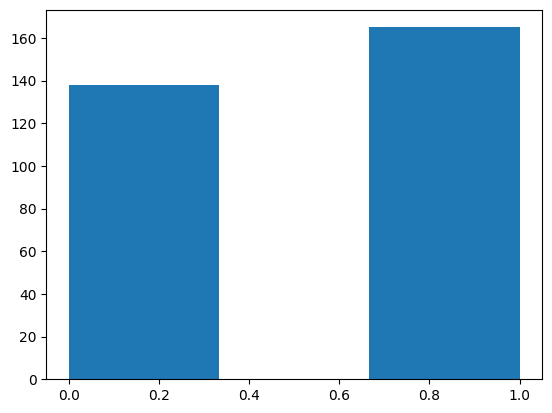

In [2]:
data = pd.read_csv("heart-disease.csv")
input_var = data.drop("target", axis=1)
target    = data["target"]
plt.hist(data["target"],3)
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state=0)

We started by taking a look at the class target histogram, to get an idea of the class distribution.

In [19]:
def evaluate_model(model, X, y, cv, scaler=None):
    accuracies = []
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        if scaler:
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))

    return accuracies

# Evaluate models
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()

knn_accuracies = evaluate_model(knn, input_var, target, cv)
nb_accuracies = evaluate_model (nb,  input_var, target, cv)

Naïve Bayes
min-max difference =  0.08196721311475408
IQR =  0.04672131147540981
kNN, k = 5 
min-max difference =  0.1262295081967213
IQR =  0.07704918032786878


/var/folders/l7/k38r85dx7nb_kcrh6q0wfx7r0000gn/T/ipykernel_22756/1395382651.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([knn_accuracies, nb_accuracies],


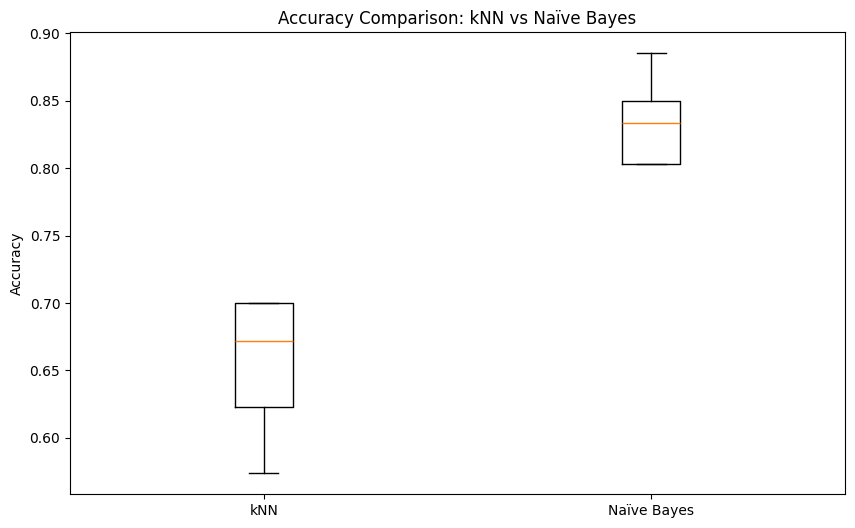

In [79]:
plt.figure(figsize=(10, 6))
plt.boxplot([knn_accuracies, nb_accuracies],
            labels=['kNN', 'Naïve Bayes'])
plt.title('Accuracy Comparison: kNN vs Naïve Bayes')
plt.ylabel('Accuracy')


sorted_knn_accuracies = sorted(knn_accuracies)
knn_min, knn_q1, knn_q2, knn_q3, knn_max = np.quantile(
    sorted_knn_accuracies,[0,0.25,0.5,0.75,1])
sorted_nb_accuracies = sorted(nb_accuracies)
nb_min, nb_q1, nb_q2, nb_q3, nb_max = np.quantile(
    sorted_nb_accuracies,[0,0.25,0.5,0.75,1])

print("Naïve Bayes")
print("min-max difference = ",nb_max-nb_min)
print("IQR = ",nb_q3-nb_q1) # IQRange
print("kNN, k = 5 ")
print("min-max difference = ", knn_max-knn_min)
print("IQR = ",knn_q3-knn_q1) # IQRange
plt.show()


a)
Both the Interquartile Range and the difference between maximum and minimum values are smaller for the Naïve Bayes model than for kNN model, this shows that the performance of Naïve Bayes is more stable. It is also true that the accuracy is better on the Naïve Bayes overall. For the kNN model the training data is somewhat small (N=303) and the values from the various classes are very different from one another (for example sex and age, 2 cases for sex, up to 100 for age). Moreover, there are 12 input dimensions, and in such higher dimensionality Naïve-Bayes works better.

# b) Min-Max scaler

/var/folders/l7/k38r85dx7nb_kcrh6q0wfx7r0000gn/T/ipykernel_22756/447640255.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([knn_accuracies, knn_accuracies_scaled,nb_accuracies ,nb_accuracies_scaled],


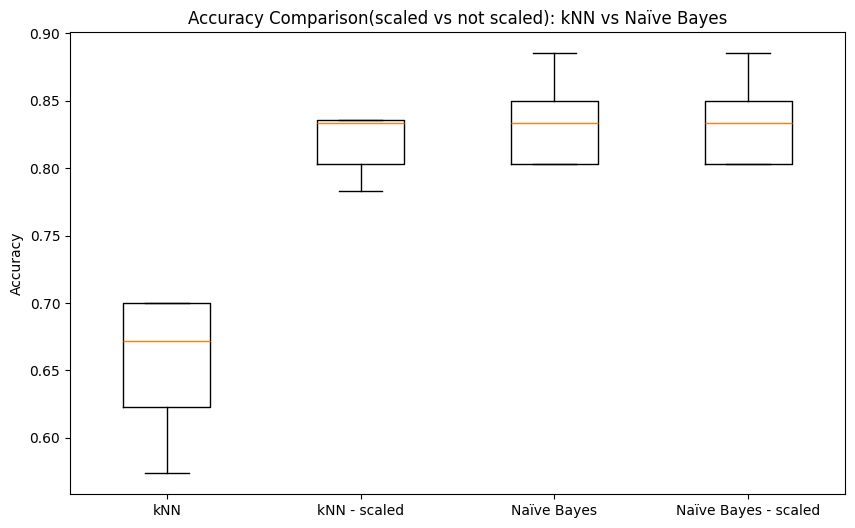

In [93]:
scaler = MinMaxScaler()
knn_accuracies_scaled = evaluate_model(knn, input_var, target, cv, scaler)
nb_accuracies_scaled = evaluate_model(nb,   input_var, target, cv, scaler)

plt.figure(figsize=(10, 6))
plt.boxplot([knn_accuracies, knn_accuracies_scaled,nb_accuracies ,nb_accuracies_scaled],
            labels=['kNN',"kNN - scaled",
                    'Naïve Bayes','Naïve Bayes - scaled'])
plt.title('Accuracy Comparison(scaled vs not scaled): kNN vs Naïve Bayes')
plt.ylabel('Accuracy')
plt.show()

b) The Min - Max Scaler has a great impact on the performance of the kNN model, whereas it doesn't really impact the performance of the Naïve-Bayes. This comes from the fact that doing a MinMax scaling prevents features with larger scales to dominate the kNN model, on the other side GaussianNB assumes a normal distribution of the parameters and the shape of the distribution doesn't change with the MinMax scaling.

In [24]:
t_statistic, p_value = stats.ttest_rel(knn_accuracies, nb_accuracies)

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    if np.mean(knn_accuracies) > np.mean(nb_accuracies):
        print("\"the 𝑘𝑁𝑁 model is statistically superior to naïve Bayes regarding accuracy\" hypothesis is True")
    else:
        print("\"the 𝑘𝑁𝑁 model is statistically superior to naïve Bayes regarding accuracy\" hypothesis is False")
else:
    print("There is no statistically significant difference between kNN and Naïve Bayes")

T-statistic: -6.6903
P-value: 0.0026
"the 𝑘𝑁𝑁 model is statistically superior to naïve Bayes regarding accuracy" is False


# 2) Data Preparation and Model evaluation
We have decided to keep the MinMax scaling given the previous results in 1.b) showing an significant improvement over the performance of the kNN model. 

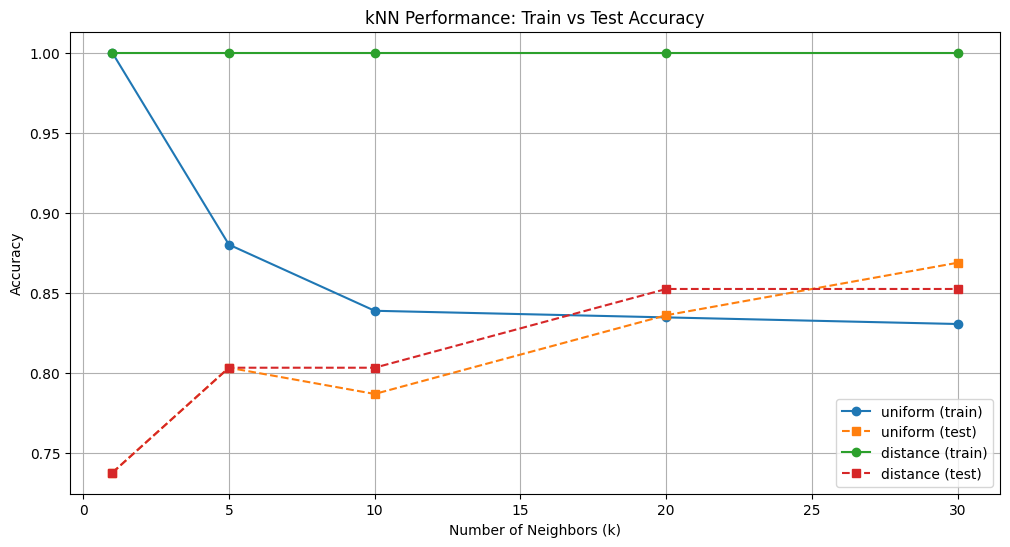

In [82]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    input_var, target, test_size=0.2, random_state=0, stratify=target)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Set up the cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

def evaluate_knn(k, weights):
    knn = KNeighborsClassifier(n_neighbors=k, weights=weights)

    # Cross-validation scores
    cv_scores = []
    for train_idx, val_idx in cv.split(X_train_scaled, y_train):
        X_train_cv, X_val_cv = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

        knn.fit(X_train_cv, y_train_cv)
        cv_scores.append(knn.score(X_val_cv, y_val_cv))

    # Train and test scores
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)

    return np.mean(cv_scores), train_score, test_score

# Evaluate models
k_values = [1, 5, 10, 20, 30]
weight_types = ['uniform', 'distance']

results = []
for weights in weight_types:
    for k in k_values:
        cv_score, train_score, test_score = evaluate_knn(k, weights)
        results.append({
            'k': k,
            'weights': weights,
            'cv_score': cv_score,
            'train_score': train_score,
            'test_score': test_score
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
plt.figure(figsize=(12, 6))

for weights in weight_types:
    data = results_df[results_df['weights'] == weights]
    plt.plot(data['k'], data['train_score'], marker='o', label=f'{weights} (train)')
    plt.plot(data['k'], data['test_score'], marker='s', linestyle='--', label=f'{weights} (test)')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('kNN Performance: Train vs Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

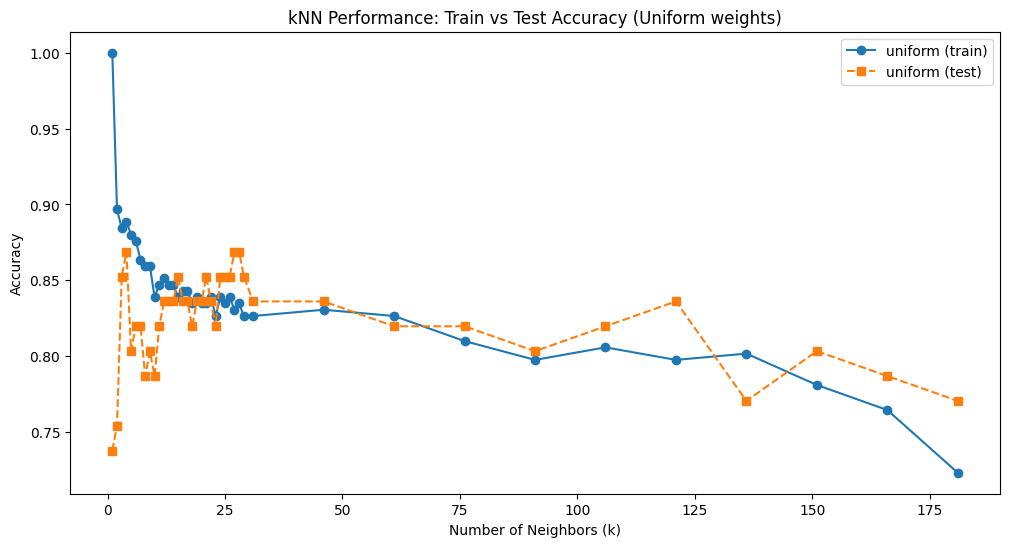

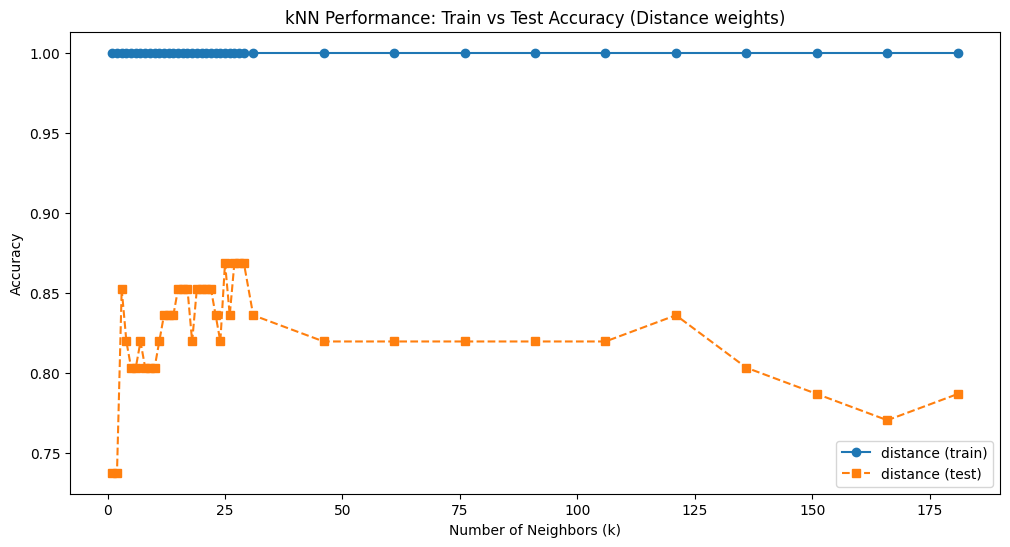

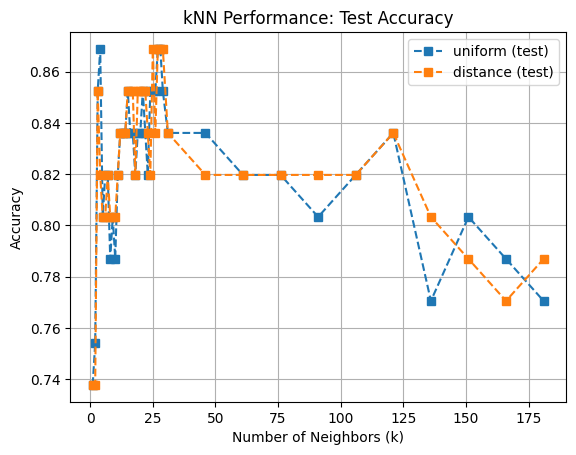

In [95]:

# Evaluate models
k_values = [1, 5, 10, 20, 30]
weight_types = ['uniform', 'distance']

results = []
k_values_2 = []
k_values_3 = []
for k2 in range(1,30,1):
    k_values_2.append(k2)
for k2 in range(31,190,15):
    k_values_2.append(k2)

for weights in weight_types:
    for k2 in k_values_2:
        cv_score, train_score, test_score = evaluate_knn(k2, weights)
        results.append({
            'k': k2,
            'weights': weights,
            'cv_score': cv_score,
            'train_score': train_score,
            'test_score': test_score
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
plt.figure(figsize=(12, 6))

data = results_df[results_df['weights'] == "uniform"]
data_trim = (data)
plt.plot(data['k'], data['train_score'],
         marker='o', label=f'uniform (train)')
plt.plot(data['k'], data['test_score'], marker='s', linestyle='--', label=f'uniform (test)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('kNN Performance: Train vs Test Accuracy (Uniform weights)')
plt.legend()

plt.figure(figsize=(12, 6))
data = results_df[results_df['weights'] == "distance"]
plt.plot(data['k'], data['train_score'],
         marker='o', label=f'distance (train)')
plt.plot(data['k'], data['test_score'], marker='s', linestyle='--', label=f'distance (test)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('kNN Performance: Train vs Test Accuracy (Distance weights)')
plt.legend()
plt.figure()

for weights in weight_types:
    data = results_df[results_df['weights'] == weights]
    plt.plot(data['k'], data['test_score'], marker='s', linestyle='--', label=f'{weights} (test)')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('kNN Performance: Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 2 b) 
It is interesting to notice that using the distance weights we always get a training accuracy of 1.00. The same does not apply to the uniform weights where there is a tendency to reduce the accuracy based on the number k of Nearest Neighboors considered in the training, this may be due to underfitting, and given we have no distinguishing factor between the closest neighboors and the neighboors more far away.
When it comes to the testing accuracy, we can see that changing the number k of Nearest Neighboors for a value of 3 or 4 there is a small peak, this first peak is in both cases a bit volatile (volatility that is probably related to overfitting) and then another peak at around 25-30, this second peak in accuracy is more stable with the change of the number k. After that the training accuracy decreases as k increases, probably due to underfitting.
We can also show that although the training accuracy is very different for the different weights, the difference in the testing accuracy is not as big.

# 3) 
One of the problems in the application of Naïve Bayes model is that we assume that the variables are independent, which is generally not the case for health related data. In order to illustrate this we can make a correlation matrix of the variables at hand. From the correlation matrix we can, for example, see that there is a clear negative correlation between the oldpeak and the slope classes.


In [88]:
data = pd.read_csv("heart-disease.csv")

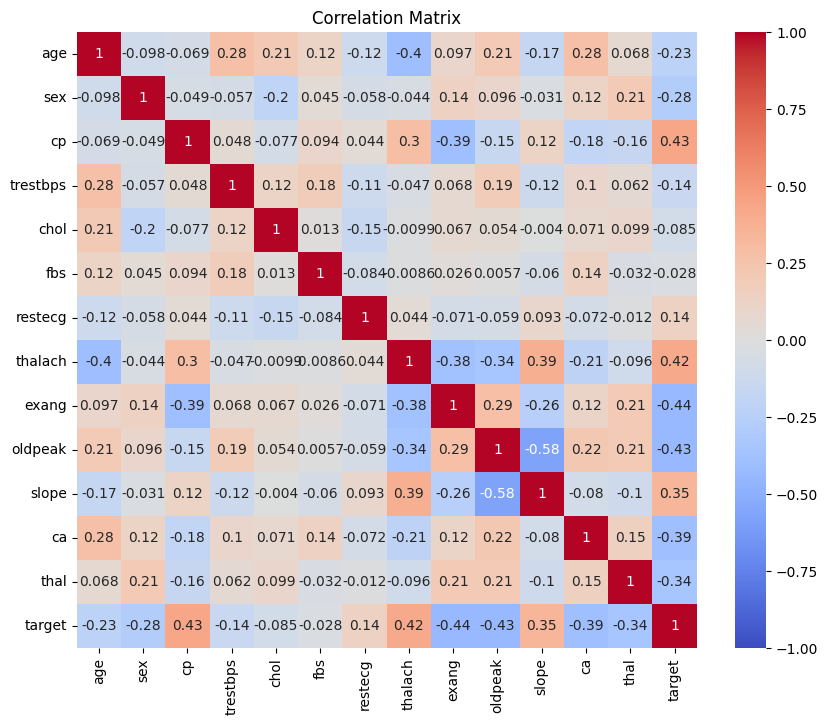

In [89]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()


Another problem that we may have in using the Naïve Bayes model with Gaussian Assumption is that we assume that there is a Bayesian/Normal distribution for the continuous data, this may lead to a problem given that the majority of the input variables in our data set are not continuous data, rather closer to binary or very small discrete classes, as we can see in the table below of the unique values for each class, with most of them being below 5 different values.

In [90]:
# Create a new DataFrame to store the results
result_df = pd.DataFrame(columns=['Class', 'Unique_Values'])
result_list = []
# Iterate through each column in the original DataFrame
for column in data.columns:
    # Get the number of unique values
    unique_count = data[column].nunique()

    # Add a row to the result DataFrame
    result_list.append({'Class': column, 'Unique_Values': unique_count})

# Sort the result DataFrame by the number of unique values
result_df = pd.DataFrame(result_list)

# Display the result
print(result_df)

       Class  Unique_Values
0        age             41
1        sex              2
2         cp              4
3   trestbps             49
4       chol            152
5        fbs              2
6    restecg              3
7    thalach             91
8      exang              2
9    oldpeak             40
10     slope              3
11        ca              5
12      thal              4
13    target              2
